1、野外正在进行9（n=9）口石油勘探井的发掘工作，每一口井能够开发出油的概率是0.1（p=0.1）。请问，最终所有的勘探井都勘探失败的概率？

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [54]:
np.random.seed(20201123)
n = 9# 做某件事情的次数
p = 0.1# 做某件事情成功的概率
size = 200000
x = np.random.binomial(n, p,size)

In [55]:
print(np.sum(x == 0) / size)

0.3869


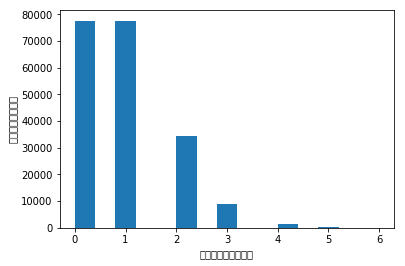

In [56]:
plt.hist(x,bins=15)
plt.xlabel('随机变量：成功次数')
plt.ylabel('样本中出现的次数')
plt.show()

In [61]:
s = stats.binom.pmf(range(11), n, p)#二项分布，统计中离散型概率事件的概率质量函数
print(np.around(s, 3))

[0.387 0.387 0.172 0.045 0.007 0.001 0.    0.    0.    0.    0.   ]


模拟投硬币，投2次，请问两次都为正面的概率？

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [63]:
np.random.seed(20201124)
n=2
p=0.5
size=50000
x=np.random.binomial(n,p,size)

In [67]:
np.sum(x==0)/size,np.sum(x==1)/size,np.sum(x==2)/size

(0.25062, 0.50252, 0.24686)

In [68]:
y = stats.binom.rvs(n, p, size=size)

In [72]:
np.sum(y==0)/size,np.sum(y==1)/size,np.sum(y==2)/size

(0.2509, 0.49786, 0.25124)

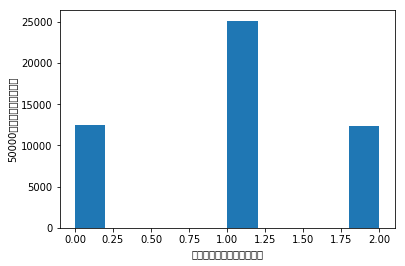

In [71]:
plt.hist(x)
plt.xlabel('随机变量：硬币为正面次数')
plt.ylabel('50000个样本中出现的次数')
plt.show()

In [75]:
s = stats.binom.pmf(range(n + 1), n, p)
print(np.around(s, 3))

[0.25 0.5  0.25]


#泊松分布 poisson.pmf(k) = exp(-lam) lam*k / k! 主要用于估计某个时间段某事件发生的概率。

假定某航空公司预定票处平均每小时接到42次订票电话，那么10分钟内恰好接到6次电话的概率是多少？

In [76]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [82]:
np.random.seed(20201124)
lam=42/6
size=100000
x=np.random.poisson(lam,size)

In [83]:
print(np.sum(x == 6) / size)

0.14853


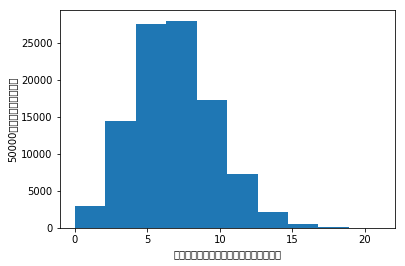

In [84]:
plt.hist(x)
plt.xlabel('随机变量：每十分钟接到订票电话的次数')
plt.ylabel('50000个样本中出现的次数')
plt.show()

In [85]:
x = stats.poisson.pmf(6, lam)
print(x)

0.14900277967433773


#超几何分布 numpy.random.hypergeometric(ngood, nbad, nsample, size=None) 各次实验不是独立的，各次实验成功的概率也不等.
表示对一个超几何分布进行采样，size表示采样的次数，ngood表示总体中具有成功标志的元素个数，nbad表示总体中不具有成功标志的元素个数，ngood+nbad表示总体样本容量，nsample表示抽取元素的次数（小于或等于总体样本容量），函数的返回值表示抽取nsample个元素中具有成功标识的元素个数。

一共20只动物里有7只是狗，抽取12只有3只狗的概率（无放回抽样）。

In [86]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [88]:
np.random.seed(20201124)
size=50000
x=np.random.hypergeometric(ngood=7,nbad=13,nsample=12,size=size)
print(np.sum(x==3)/size)

0.19956


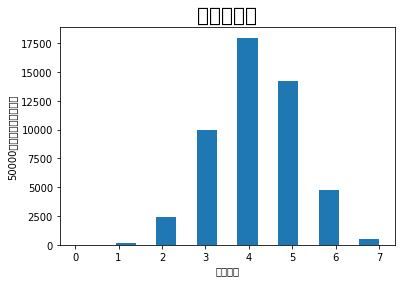

In [91]:
plt.hist(x, bins=15)
plt.xlabel('狗的数量')
plt.ylabel('50000个样本中出现的次数')
plt.title('超几何分布',fontsize=20)
plt.show()

In [93]:
s = stats.hypergeom.pmf(k=3, M=20, n=7, N=12)
print(np.round(s, 3))

0.199


#连续随机变量
#均匀分布 numpy.random.uniform(low=0.0, high=1.0, size=None)

在low到high范围内，创建大小为size的均匀分布的随机数。

In [94]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [95]:
np.random.seed(20201124)
low=0
high=50
size=5000
x=np.random.uniform(low,high,size)

In [103]:
y = (np.sum(x < 30) - np.sum(x < 10)) / size
y

0.389

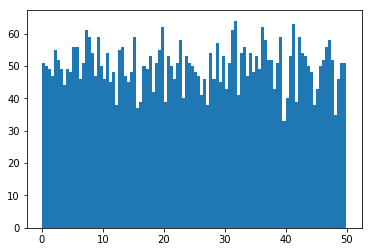

0.39999999999999997


In [102]:
plt.hist(x, bins=100)
plt.show()
a = stats.uniform.cdf(10, 0, 50)
b = stats.uniform.cdf(30, 0, 50)
print(b - a)

#根据指定大小产生[0,1)之间均匀分布的随机数。

In [106]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [107]:
np.random.seed(20201124)
print(np.random.uniform())  # 0.7594819171852776
print(np.random.uniform(size=5))
print(np.random.rand(5))
print(np.random.rand(4, 3))

0.16595762053434393
[0.18713139 0.16141027 0.08701148 0.89495402 0.44014387]
[0.45409661 0.15475296 0.70117664 0.19671135 0.62914882]
[[0.60799848 0.69312633 0.07419549]
 [0.46756484 0.94894489 0.51506329]
 [0.03977621 0.00791317 0.07609488]
 [0.85876891 0.11780227 0.30647184]]


若high不为None时，取[low,high)之间随机整数，否则取值[0,low)之间随机整数。

In [108]:
import numpy as np
np.random.seed(20201124)
x = np.random.randint(2, size=10)
print(x)
y = np.random.randint(5, size=(2, 4))
print(y)
z = np.random.randint(1, 10, [3, 4])
print(z)

[0 1 1 0 0 0 0 0 1 1]
[[3 0 3 2]
 [1 4 2 2]]
[[4 6 7 4]
 [4 6 8 7]
 [2 1 5 7]]


#正态分布 numpy.random.randn(d0, d1, ..., dn) ,
numpy.random.normal(loc=0.0, scale=1.0, size=None) 
normal()为创建均值为 loc（mu），标准差为 scale（sigma），大小为 size 的数组

#根据指定大小产生满足标准正态分布的数组（均值为0，标准差为1）。

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(20201124)
size = 50000
x = np.random.randn(size)
y1 = (np.sum(x < 1) - np.sum(x < -1)) / size
y2 = (np.sum(x < 2) - np.sum(x < -2)) / size
y3 = (np.sum(x < 3) - np.sum(x < -3)) / size

In [110]:
y1,y2,y3

(0.68092, 0.9557, 0.99776)

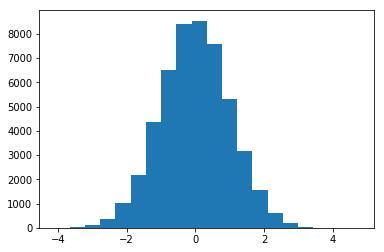

In [111]:
plt.hist(x, bins=20)
plt.show()
y1 = stats.norm.cdf(1) - stats.norm.cdf(-1)
y2 = stats.norm.cdf(2) - stats.norm.cdf(-2)
y3 = stats.norm.cdf(3) - stats.norm.cdf(-3)

In [112]:
y1,y2,y3

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

In [113]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(20201124)
x = 0.5 * np.random.randn(2, 4) + 5

In [114]:
x

array([[4.79670884, 4.78295086, 4.92900556, 5.46844893],
       [4.40392523, 4.92074704, 4.53036121, 5.31151958]])

In [115]:
np.random.seed(20201124)
mu = 5#平均值
sigma = 0.5#标准差
x = np.random.normal(mu, sigma, (2, 4))
print(x)
size = 50000
x = np.random.normal(mu, sigma, size)
print(np.mean(x)) 
print(np.std(x, ddof=1)) #样本标准差

[[4.79670884 4.78295086 4.92900556 5.46844893]
 [4.40392523 4.92074704 4.53036121 5.31151958]]
4.999355620571171
0.49927448795528623


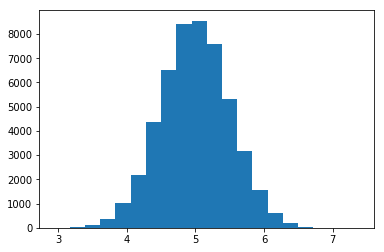

In [116]:
plt.hist(x, bins=20)
plt.show()

#指数分布 numpy.random.exponential(scale=1.0, size=None) 

scale = 1/lambda

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(20201124)
lam = 7
size = 50000
x = np.random.exponential(1 / lam, size)
y1 = (np.sum(x < 1 / 7)) / size
y2 = (np.sum(x < 2 / 7)) / size
y3 = (np.sum(x < 3 / 7)) / size
y1,y2,y3

(0.63272, 0.86676, 0.95212)

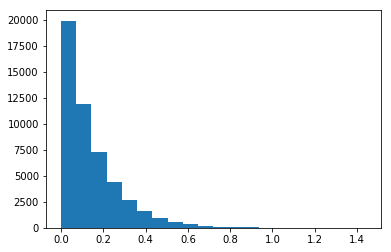

(0.6321205588285577, 0.8646647167633873, 0.950212931632136)

In [118]:
plt.hist(x, bins=20)
plt.show()
y1 = stats.expon.cdf(1 / 7, scale=1 / lam)
y2 = stats.expon.cdf(2 / 7, scale=1 / lam)
y3 = stats.expon.cdf(3 / 7, scale=1 / lam)
y1,y2,y3

#随机从序列中获取元素 numpy.random.choice(a, size=None, replace=True, p=None)
从序列中获取元素，若a为整数，元素取值从np.range(a)中随机获取；若a为数组，取值从a数组元素中随机获取。该函数还可以控制生成数组中的元素是否重复replace，以及选取元素的概率p。

In [119]:
import numpy as np
np.random.seed(20201124)
x = np.random.choice(10, 3)
print(x)  
x = np.random.choice(10, 3, p=[0.05, 0, 0.05, 0.9, 0, 0, 0, 0, 0, 0])
print(x)
x = np.random.choice(10, 3, replace=False, p=[0.05, 0, 0.05, 0.9, 0, 0, 0, 0, 0, 0])
print(x)  
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
x = np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])
print(x) 
np.random.seed(20201124)
x = np.random.randint(0, 10, 3)
print(x)

[7 6 2]
[3 3 3]
[3 2 0]
['piglet' 'pooh' 'Christopher' 'pooh' 'piglet']
[7 6 2]


#numpy.random.shuffle(x)
#对x进行重排序，如果x为多维数组，只沿第 0 轴洗牌，改变原来的数组，输出为None。

洗牌，改变自身内容，打乱顺序。

In [120]:
import numpy as np
np.random.seed(20201124)
x = np.arange(10)
np.random.shuffle(x)
print(x)
print(np.random.shuffle([1, 4, 9, 12, 15]))
x = np.arange(20).reshape((5, 4))
print(x)
np.random.shuffle(x)
print(x)


[0 5 3 1 9 4 8 2 6 7]
None
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[16 17 18 19]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [12 13 14 15]
 [ 4  5  6  7]]


permutation()函数的作用与shuffle()函数相同，可以打乱第0轴的数据，但是它不会改变原来的数组。

In [122]:
import numpy as np
np.random.seed(20201124)
x = np.arange(10)
y = np.random.permutation(x)
print(y)
print(np.random.permutation([1, 4, 9, 12, 15]))
x = np.arange(20).reshape((5, 4))
print(x)
y = np.random.permutation(x)
print(y)

[0 5 3 1 9 4 8 2 6 7]
[15  4 12  9  1]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[16 17 18 19]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [12 13 14 15]
 [ 4  5  6  7]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


创建一个形为5×3的二维数组，以包含5到10之间的随机数。
【知识点：随机抽样】
如何创建随机二维数组？

In [126]:
import numpy as np
np.random.seed(20201124)
x= np.random.randint(5,11, size=(5, 3))
x

array([[ 7,  8,  7],
       [ 9,  7, 10],
       [ 6,  8,  5],
       [ 8,  7, 10],
       [ 6,  9,  7]])

创建分别具有5000个数据的训练集（xi，y）和测试集（xi，y），其中xi在间隔（-10,10）上均匀随机分布。
为了使回归问题“真实”，大的均匀噪声分布在[-0.2,0.2]已添加到所有训练样本中，同时测试数据保持无噪声。

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

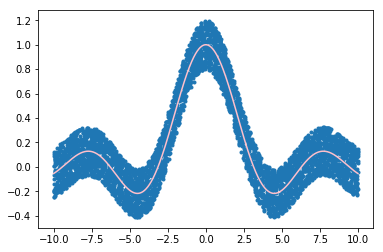

In [142]:
x1=np.random.uniform(-10,10,5000)
y1=np.sin(x1)/x1+np.random.uniform(-0.2,0.2,5000)
x=np.sort(np.random.uniform(-10,10,5000))
y=np.sin(x)/x
plt.scatter(x1,y1,marker=".")
plt.plot(x,y,color='pink')
plt.show()